In [1]:
"""
Purpose: To be able and tell when theh branching activity
does not have a large angle between the sides and they run alongside each other

- this will be ignored for the very thick apical

"""

'\nPurpose: To be able and tell when theh branching activity\ndoes not have a large angle between the sides and they run alongside each other\n\n- this will be ignored for the very thick apical\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-20 21:41:00,638 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 21:41:00,644 - settings - Setting database.user to celiib
INFO - 2021-04-20 21:41:00,645 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 21:41:00,653 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-20 21:41:00,658 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 21:41:00,670 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-20 21:41:01,197 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 21:41:01,203 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 21:41:01,204 - settings - Setting database.user to celiib
INFO - 2021-04-20 21:41:01,206 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 21:41:01,206 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 21:41:01,211 - settings - Setting database.user to celiib
INFO - 2021-04-20 21:41:01,215 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 21:41:01,220 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 21:41:01,888 - settings - Setting enable_python_native_blobs to True


In [5]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-20 21:41:15,408 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 21:41:15,415 - settings - Setting database.user to celiib
INFO - 2021-04-20 21:41:15,417 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 21:41:15,428 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 21:41:16,392 - settings - Setting enable_python_native_blobs to True


In [6]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru

# Downloading the neuron

In [403]:
vu.old_to_new_segment_id(segment_id = 864691135564655959)

864691135724333739

In [433]:
segment_id = 864691136105498585 # worked for this segment
# segment_id = 864691135212632448 # dont think fork existed
# segment_id = 864691135564655959
minnie.Decomposition() & f"segment_id = {segment_id}"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691136105498585,0,0.25,30.00,7,0,1,=BLOB=,332957,689602,0,0,0,0,1,6,62,39,4207536.831588222,1856257.3544398847,45864.626,85.841,85.841,276.001,272.655,272,6.464589874958456e-05,4.387096774193548,2604692.559,22,0.00010442691175208291,12.364,104312137661.36154,119065350.43993981,24791.734888268766,40047.7735082137,4741460802.789161,3808.4313


In [434]:
neuron_objs,split_indexes = du.decomposition_with_spine_recalculation(segment_id=segment_id,)
                                       #border_validation=False)

Decompressing Neuron in minimal output mode...please wait
Pulled from Table Decomposition so setting split_index = 0
Dont need spine recalculation
Number of Neurons found = 1


In [435]:
neuron_obj = neuron_objs[0]

In [436]:
import axon_utils as au
neuron_obj_axon = au.complete_axon_processing(neuron_obj)
neuron_obj_axon

endnodes_to_test = [1935]
Skeleton paths distances = [24973.03453593]
Filtered indexes = [0]
len(filtered_skeletons) = 1
sk_angles = [122.1524023]
base_final_widths = [108.41989201 108.41989201 108.41989201]
overall_ais_width = 108.41989200898661
ais_width = 108.41989200898661
endnodes_to_test = []
endnodes_to_test = []
endnodes_to_test = []
endnodes_to_test = []
endnodes_to_test = []
Starting axon branch was not the limb starting node so generating border vertices and computing upstream branch
upstream_node_to_axon_starting_branch = 8


  0%|          | 0/1 [00:00<?, ?it/s]

More than 1 seperated mesh (taking the top one): [<trimesh.Trimesh(vertices.shape=(52108, 3), faces.shape=(104012, 3))>
 <trimesh.Trimesh(vertices.shape=(13721, 3), faces.shape=(27348, 3))>
 <trimesh.Trimesh(vertices.shape=(1756, 3), faces.shape=(3507, 3))>
 <trimesh.Trimesh(vertices.shape=(126, 3), faces.shape=(252, 3))>]
root_curr = [712095.9 863814.4 798222.4]
Time for preparing soma vertices and root: 0.00024437904357910156
invalidation_d = 1500
smooth_neighborhood = 0
smooth_neighborhood = 0
soma_pt = [712095.9 863814.4 798222.4]
invalidation_d = 1500
cc_vertex_thresh = 25
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


all_paths = [[[3533, 48020, 42965, 46637, 47045, 36811, 33567, 50087, 43494, 21415, 3850, 50251, 27014, 9249, 17341, 25920, 34024, 34025, 20388, 20389, 20386, 48811, 24519, 2771, 45274, 47102, 44605, 23208, 27202, 20461, 13684, 39384, 17513, 50267, 51419, 8286, 11239, 28808, 50948, 6914, 48083, 18990, 49250, 23404, 1889, 5626, 31623, 5624, 50702, 46894, 13842, 30007, 26294, 624, 622, 26302, 4283, 12986, 50902, 49767, 32328, 48132, 30768, 34355, 34629, 8494, 48916, 18000, 18001, 13997, 18004, 23493, 1736, 33908, 49863, 49191, 27305, 46541, 48745, 29361, 7513, 37648, 32211, 28144, 51389, 28140, 51022, 25642, 11649, 51486, 26958, 39140, 3819, 21863, 14666, 10682, 1595, 31339, 31341, 48182, 2742, 197, 24894, 41275, 27069, 23117, 5191, 24608, 47428, 36743, 15920, 14822, 49470, 22848, 24453, 45652, 2869, 5983, 51559, 6808, 28581, 44531, 51221, 4835, 51546, 34172, 50309, 51208, 20501, 26718, 23307, 27491, 31700, 39637, 13767, 17904, 43615, 561, 26200, 26205, 564, 33574, 46619, 51098, 3359, 33

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.536320686340332
connecting at the root
branches_touching_root = [141]
combining close nodes
combine_threshold = 1300
length of Graph = 13515
After combining close endpoints max(kept_branches_idx) = 141, len(kept_branches_idx) = 138
empty_indices % = 0.0
 conflict_indices % = 0.03175839390792662
AFTER face_lookup_resolved_test
Decomposing first pass: 7.502661228179932
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.743171691894531e-05
Total time for MAP sublimb processing 4.0531158447265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.744529724121094e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.09937930107116699
sbv[0].reshape(-1,3) = [[712095.9 863814.4 798222.4]]
closest_sk_pt_coord BEFORE = [71

In [437]:
nviz.plot_axon(neuron_obj_axon)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Want to visualize the error mesh where might have forking

In [410]:
neuron_obj_axon.segment_id

864691135564655959

limb_name = L4

 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L4 because was the limb in the first key


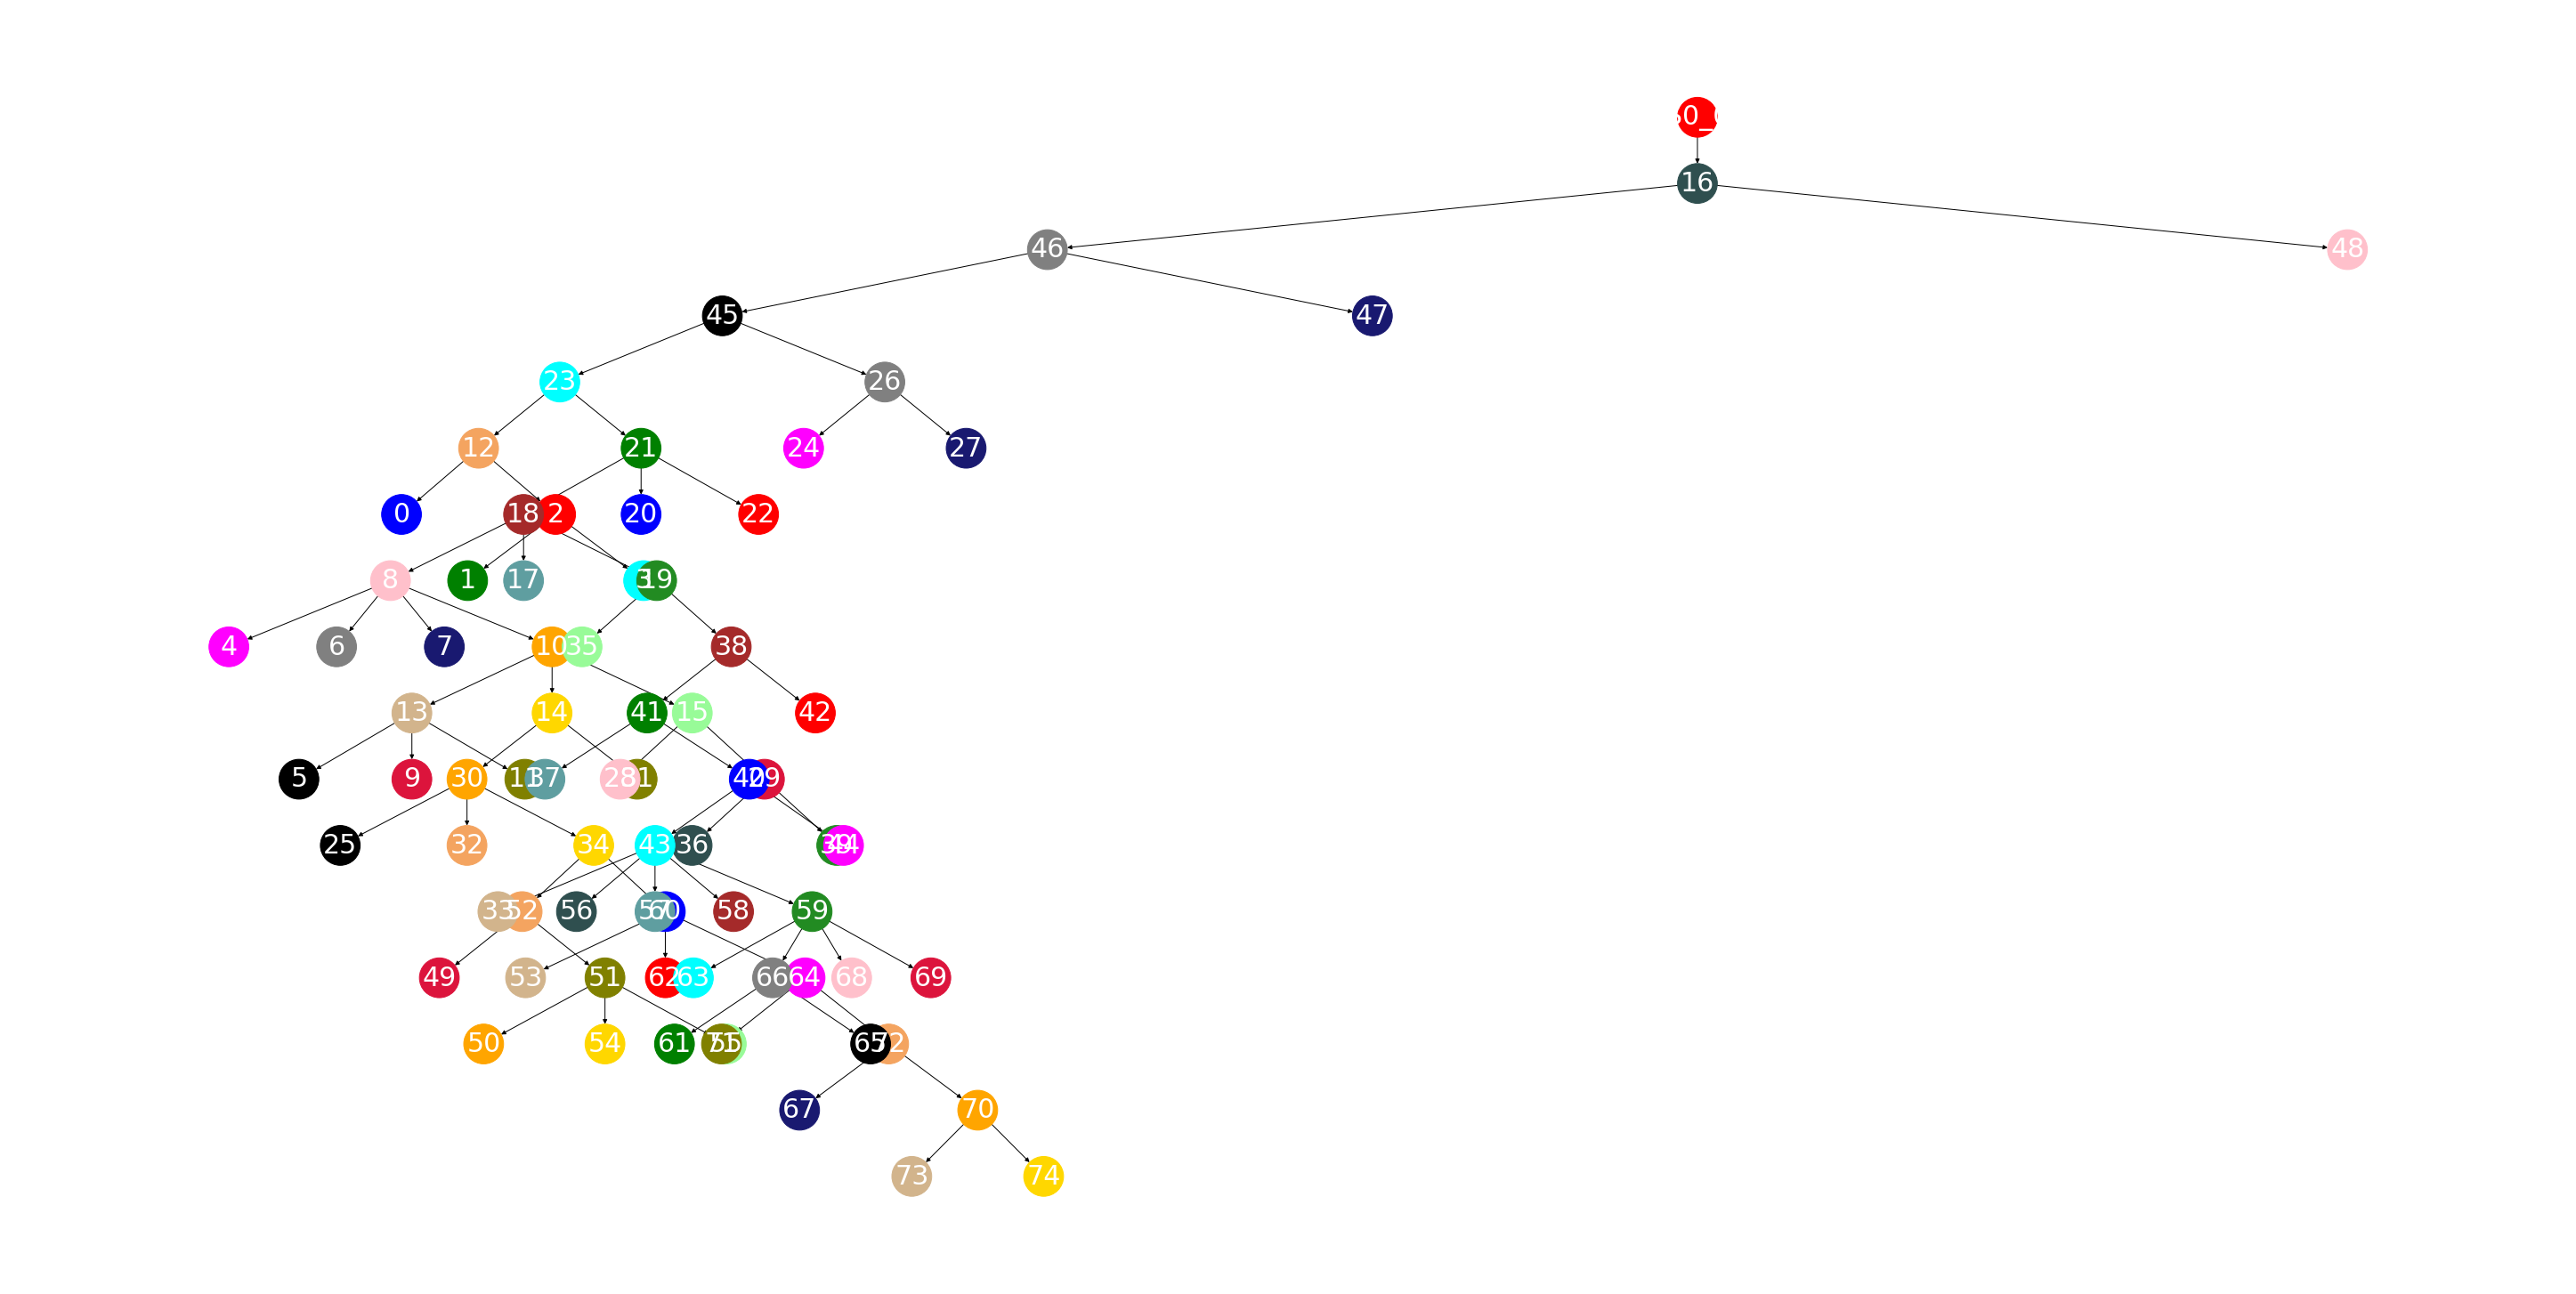

In [427]:
nviz.visualize_neuron_specific_limb(neuron_obj_axon,
                                   neuron_obj.axon_limb_name)

In [412]:
error_mesh = vu.error_mesh_from_manual_proofreading(neuron_obj_axon.segment_id,
                                                   plot_error_and_valid_mesh=False)

In [415]:
nviz.plot_objects(error_mesh,
                  main_mesh_color="red",
                  mesh_alpha=1,
                 append_figure=True,
                 show_at_end=False)

In [416]:
error_branches = vu.error_branches_from_old_new_segment_mesh(neuron_obj_axon,
                                           )[neuron_obj_axon.axon_limb_name]

In [177]:
for b in error_branches:
    print(f"Branch {b}:")
    nviz.plot_branches_with_boutons(neuron_obj_axon[0][b])

Branch 106:
No boutons to plot
width = {'median_mesh_center': 77.34531379438725, 'no_spine_median_mesh_center': 77.34531379438725, 'no_bouton_median': 77.34531379438725}, 
n_boutons = 0,
skeleton_length (in microns) = 3.2072250047303976
area = 3.737826128004001


Branch 116:
No boutons to plot
width = {'median_mesh_center': 63.428307704865055, 'no_spine_median_mesh_center': 63.428307704865055, 'no_bouton_median': 63.428307704865055}, 
n_boutons = 0,
skeleton_length (in microns) = 3.3466404488929307
area = 1.5826053655587597


Branch 201:
width = {'median_mesh_center': 55.105065062492656, 'no_spine_median_mesh_center': 55.105065062492656, 'no_bouton_median': 54.329591673521904}, 
n_boutons = 1,
skeleton_length (in microns) = 13.23998282920901
area = 7.966232576286011


Branch 202:
width = {'median_mesh_center': 81.21958921474048, 'no_spine_median_mesh_center': 81.21958921474048, 'no_bouton_median': 71.43840606409488}, 
n_boutons = 1,
skeleton_length (in microns) = 7.177023213392976
area = 5.609573609002603


Branch 203:
No boutons to plot
width = {'median_mesh_center': 68.1231045152641, 'no_spine_median_mesh_center': 68.1231045152641, 'no_bouton_median': 68.1231045152641}, 
n_boutons = 0,
skeleton_length (in microns) = 2.872279976007936
area = 2.3834528702048807


Branch 204:
No boutons to plot
width = {'median_mesh_center': 73.28560065406458, 'no_spine_median_mesh_center': 73.28560065406458, 'no_bouton_median': 73.28560065406458}, 
n_boutons = 0,
skeleton_length (in microns) = 5.596428647506561
area = 3.5518673207294


Branch 205:
width = {'median_mesh_center': 62.489472690448906, 'no_spine_median_mesh_center': 62.489472690448906, 'no_bouton_median': 62.32705630571049}, 
n_boutons = 1,
skeleton_length (in microns) = 30.730819629073274
area = 17.507151560305537


Branch 206:
width = {'median_mesh_center': 96.4635837978665, 'no_spine_median_mesh_center': 96.4635837978665, 'no_bouton_median': 82.5251764640407}, 
n_boutons = 24,
skeleton_length (in microns) = 95.35040431091511
area = 81.65812010772243


Branch 215:
No boutons to plot
width = {'median_mesh_center': 79.97815376915433, 'no_spine_median_mesh_center': 79.97815376915433, 'no_bouton_median': 79.97815376915433}, 
n_boutons = 0,
skeleton_length (in microns) = 4.231014502088096
area = 2.674739811277842


Branch 225:
No boutons to plot
width = {'median_mesh_center': 61.554317101069984, 'no_spine_median_mesh_center': 61.554317101069984, 'no_bouton_median': 61.554317101069984}, 
n_boutons = 0,
skeleton_length (in microns) = 9.171479041102499
area = 6.51972313744994


Branch 226:
No boutons to plot
width = {'median_mesh_center': 89.44114521968132, 'no_spine_median_mesh_center': 89.44114521968132, 'no_bouton_median': 89.44114521968132}, 
n_boutons = 0,
skeleton_length (in microns) = 4.029544814065714
area = 4.742516265537044


Branch 281:
No boutons to plot
width = {'median_mesh_center': 54.01629215672335, 'no_spine_median_mesh_center': 54.01629215672335, 'no_bouton_median': 54.01629215672335}, 
n_boutons = 0,
skeleton_length (in microns) = 1.8366515251736644
area = 1.1141174223114048


In [178]:
thin_fork_branch = 205

In [179]:
nviz.visualize_neuron(neuron_obj_axon,
                      visualize_type=["skeleton","mesh"],
                     limb_branch_dict=dict(L0=[thin_fork_branch]),
                     mesh_whole_neuron=True)


 Working on visualization type: skeleton

 Working on visualization type: mesh


In [134]:
# neuron_obj_axon.save_compressed_neuron("./",file_name=f"{neuron_obj.segment_id}_fork_test",
#                                        export_mesh=True)

Saving Neuorn in suppress_output mode...please wait
Saved File at location: 864691136105498585_fork_test


# Examples of How to Run Fork Divergence

In [299]:
# import numpy_utils as nu
# nu.turn_off_scientific_notation()
# nst.fork_divergence_from_skeletons(upstream_skeleton=limb_obj[289].skeleton,
#                     downstream_skeletons=[limb_obj[k].skeleton for k in [12, 290]],
#                                   verbose = False)

5194.6980293320985

In [328]:
# import neuron_statistics as nst
# # nst.fork_divergence(upstream_skeleton = upstream_sk,
# #                     downstream_skeletons = downstream_sk,
# #                     comparison_distance = 500,
# #                     skeletal_segment_size = 50,
# #                     plot_restrictions = True,
# #                     combining_function = np.mean)

# nst.fork_divergence_from_branch(branch_idx = 206,
#     limb_obj = neuron_obj_axon[neuron_obj_axon.axon_limb_name],
#     verbose = False,
#     plot_fork_skeleton = False,)

432.9941756354334

# Searching over the neuron object for fork divergences

In [439]:
import neuron_searching as ns

two_downstream_limb_branch = ns.query_neuron(neuron_obj_axon,
               functions_list = ["n_siblings"],
               query = "n_siblings == 1",
               return_dataframe=False,
               limbs_to_process=[neuron_obj_axon.axon_limb_name])

fork_div_limb_branch = ns.query_neuron(neuron_obj_axon,
               functions_list = ["fork_divergence"],
               query = "fork_divergence < 165",
               return_dataframe=False,
                limb_branch_dict_restriction=two_downstream_limb_branch,
               limbs_to_process=[neuron_obj_axon.axon_limb_name])

"""
Maybe a good threshold is 160??


"""
fork_div_limb_branch

,limb,node,fork_divergence
69,L0,72,143.055137
75,L0,78,143.055137
175,L0,205,111.977520
177,L0,207,111.977520


In [440]:
nviz.visualize_neuron(neuron_obj_axon,
                     limb_branch_dict={neuron_obj_axon.axon_limb_name:[72,78]},
                     mesh_whole_neuron=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Building the Edit Rule that we can now apply to hopefully achieve higher results

# -- A) Building the Function that will apply new rule

In [451]:
import error_detection as ed
ed.axon_fork_divergence_errors_limb_branch_dict(neuron_obj = neuron_obj_axon,
    divergence_threshold_mean = 160,
    verbose = True,
)

two_downstream_thick_axon_limb_branch = {'L0': array([  1,   2,   4,   5,   7,   9,  10,  11,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  27,  28,  30,  31,  32,
        33,  34,  36,  37,  38,  39,  41,  43,  44,  45,  46,  48,  50,
        51,  52,  55,  56,  58,  61,  62,  63,  65,  67,  68,  69,  70,
        71,  72,  75,  76,  77,  78,  79,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  98, 100, 102, 106, 107,
       108, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 128,
       131, 133, 134, 135, 136, 140, 141, 142, 143, 144, 145, 146, 147,
       154, 156, 159, 161, 162, 163, 164, 165, 166, 168, 171, 178, 179,
       180, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 195, 196,
       198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212,
       213, 214, 215, 216, 217, 219, 221, 222, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 242, 243, 244, 245, 246,
       248, 250, 

{'L0': array([ 72,  78, 205, 207])}

# -- B) Applying the Proofreading Rules (without the new addition) and measure performance

In [498]:
(base_filt_neuron,
 return_synapse_df,
return_validation_df) =  vu.filtered_neuron_score(neuron_obj = neuron_obj_axon,   
                        filter_list = pru.get_exc_filters_high_fidelity_axon_postprocessing(),
                        verbose = True,
                                                 plot_score=False)


--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 1:
function = crossovers
function __name__ = filter_away_crossovers
function arguments = {'axon_dependent': True, 'match_threshold': 50, 'require_two_pairs': False}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 2:
function = double_back_and_width_change
function __name__ = filter_away_large_double_back_or_width_changes
function arguments = {'perform_double_back_errors': True, 'skip_double_back_errors_for_axon': False, 'width_jump_threshold': 250, 'running_width_jump_method': True, 'double_back_axon_like_threshold': 145, 'double_back_threshold': 120}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 3:
function = high_degree_coordinates
function __name__ = filter_away_high_degree_coordinates
function arguments = {'axon_dependent': True, 'min_degree_to_find': 4}


min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4



 ---- Total time for applying filter: 137.1348431110382 -----

--- Finished Part 1: Filtering Neuron -----
Apply the presyn non_error
For presyn: # valid synapses = 216, # error synapses  = 65, # error presyns = 40
For postsyn: # valid synapses = 812, # error synapses  = 66, # error presyns = 0

--- Finished Part 2: Filtering Synapses -----
Synapsse Results:
Total Number of Synapses = 1159
n_valid_syn_ids_presyn = 216
n_errored_syn_ids_presyn = 65
n_valid_syn_ids_postsyn = 812
n_errored_syn_ids_postsyn = 66

--- Finished Part 3: Generating Validation Dataframe -----


Segment Id = 864691136105498585
Postsyn counts:
TP:805
TN:0
FP:7
FN:66
Presyn counts:
TP:210
TN:0
FP:6
FN:25


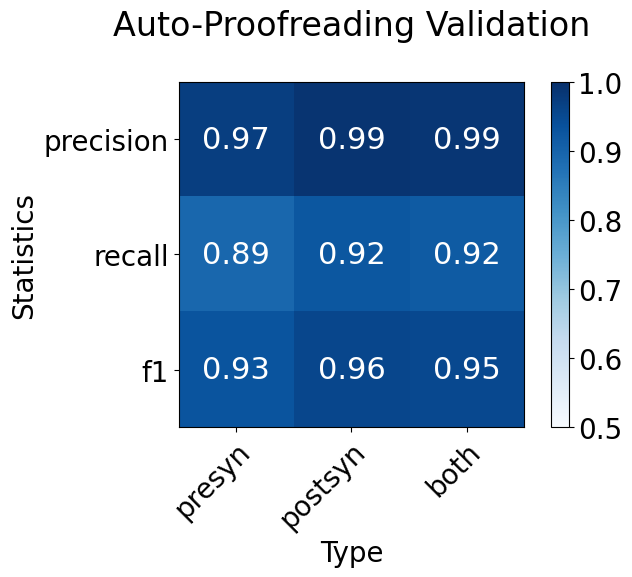

In [499]:
vu.synapse_validation_df_to_score_plot(return_validation_df)

# Plot to see the synapses that were not included

In [500]:
vu.plot_validation_synapses(segment_id,
                            validation_df = return_validation_df,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = base_filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange


# -- C) Apply the proofreading rules (with addition) and measure perfromance

In [501]:
(filt_neuron,
 return_synapse_df_revised,
return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = base_filt_neuron,   
                        filter_list = pru.v4_exc_filters(),
                        verbose = True,
                        plot_score=False)


--- Working on filter 0:
function = fork_divergence
function __name__ = filter_away_small_fork_divergence
function arguments = {'divergence_threshold_mean': 165}


limb_branch_dict_to_cancel = {'L0': array([ 68,  71, 165, 167])}


Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh





 ---- Total time for applying filter: 30.092718362808228 -----

--- Finished Part 1: Filtering Neuron -----
Apply the presyn non_error
For presyn: # valid synapses = 210, # error synapses  = 71, # error presyns = 43
For postsyn: # valid synapses = 812, # error synapses  = 66, # error presyns = 0

--- Finished Part 2: Filtering Synapses -----
Synapsse Results:
Total Number of Synapses = 1159
n_valid_syn_ids_presyn = 210
n_errored_syn_ids_presyn = 71
n_valid_syn_ids_postsyn = 812
n_errored_syn_ids_postsyn = 66

--- Finished Part 3: Generating Validation Dataframe -----


Segment Id = 864691136105498585
Postsyn counts:
TP:805
TN:0
FP:7
FN:66
Presyn counts:
TP:206
TN:0
FP:4
FN:28


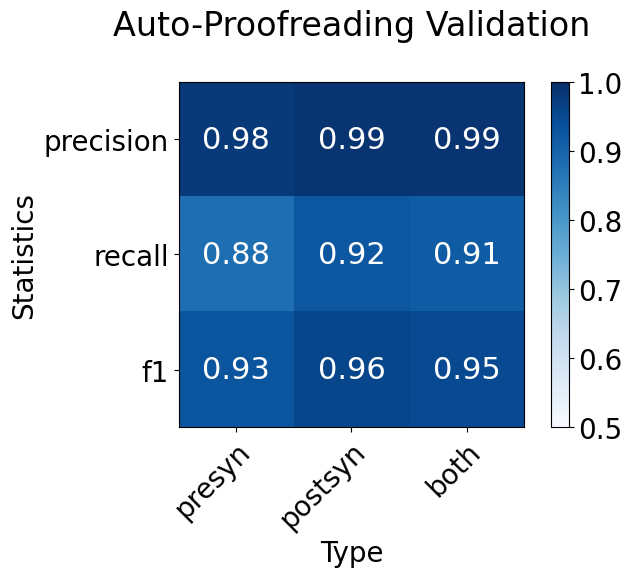

In [502]:
vu.synapse_validation_df_to_score_plot(return_validation_df_revised)